In [125]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from sklearn.metrics import mean_squared_error, classification_report

import warnings
warnings.filterwarnings('ignore')

In [126]:
df=pd.read_csv("train.csv")
df.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175296 non-null  int64  
 1   Month               175296 non-null  int64  
 2   Day                 175296 non-null  int64  
 3   Hour                175296 non-null  int64  
 4   Minute              175296 non-null  int64  
 5   Clearsky DHI        175296 non-null  int64  
 6   Clearsky DNI        175296 non-null  int64  
 7   Clearsky GHI        175296 non-null  int64  
 8   Cloud Type          175296 non-null  int64  
 9   Dew Point           175296 non-null  float64
 10  Temperature         175296 non-null  float64
 11  Pressure            175296 non-null  int64  
 12  Relative Humidity   175296 non-null  float64
 13  Solar Zenith Angle  175296 non-null  float64
 14  Precipitable Water  175296 non-null  float64
 15  Wind Direction      175296 non-nul

In [128]:
df.describe()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000
mean,2013.500274,6.523549,15.727820,11.500000,15.000000,53.065426,330.065295,254.365490,2.540474,13.564431,18.266769,1003.185230,79.376366,89.729463,2.903732,188.877796,2.262871,0.740433
std,2.871908,3.448543,8.799349,6.922206,15.000043,64.201407,370.030821,327.705006,3.021879,8.196787,8.943096,5.935749,19.678235,40.085451,1.546979,99.014733,1.281902,6.575655
min,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,-9.000000,970.000000,7.190000,8.550000,0.122000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.000000,1000.000000,65.590000,56.450000,1.534000,97.400000,1.300000,0.000000
50%,2013.500000,7.000000,16.000000,11.500000,15.000000,0.000000,0.000000,0.000000,1.000000,15.000000,20.000000,1000.000000,84.230000,89.860000,2.866000,200.000000,2.000000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,30.000000,103.000000,736.000000,535.000000,6.000000,21.000000,25.000000,1010.000000,97.950000,123.060000,4.223000,272.000000,3.000000,0.000000
max,2018.000000,12.000000,31.000000,23.000000,30.000000,565.000000,1040.000000,1063.000000,10.000000,26.900000,40.000000,1024.000000,100.000000,171.550000,7.700000,360.000000,12.900000,100.000000


In [129]:
df.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [130]:
df.duplicated().sum()

0

<AxesSubplot:>

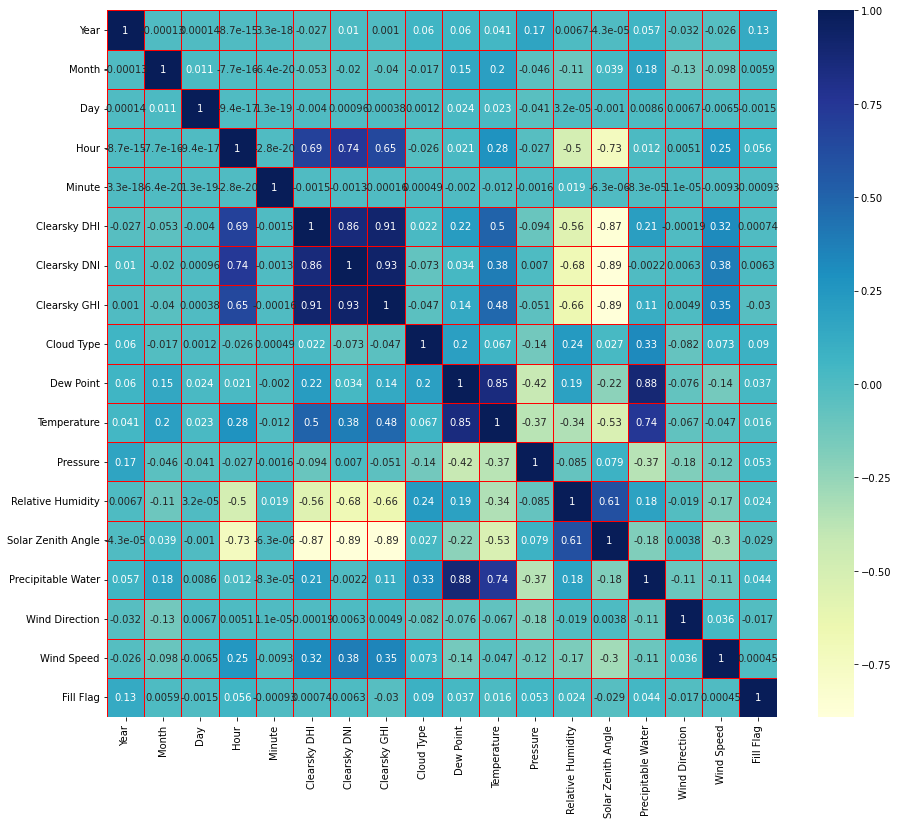

In [131]:
plt.figure(figsize= (15,13))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True, linewidth= 1, linecolor= 'red' )

In [132]:
def plot_relation(col_name_x, col_name_y, df):
    plt.figure(figsize=(15,10))
    sns.barplot(x= col_name_x, y= col_name_y, data=df)

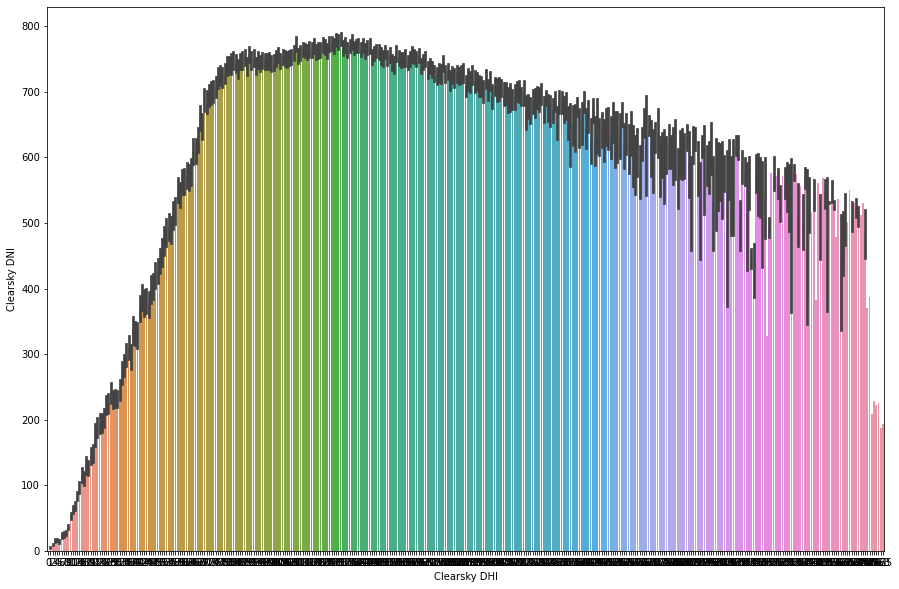

In [133]:
plot_relation('Clearsky DHI', 'Clearsky DNI', df)

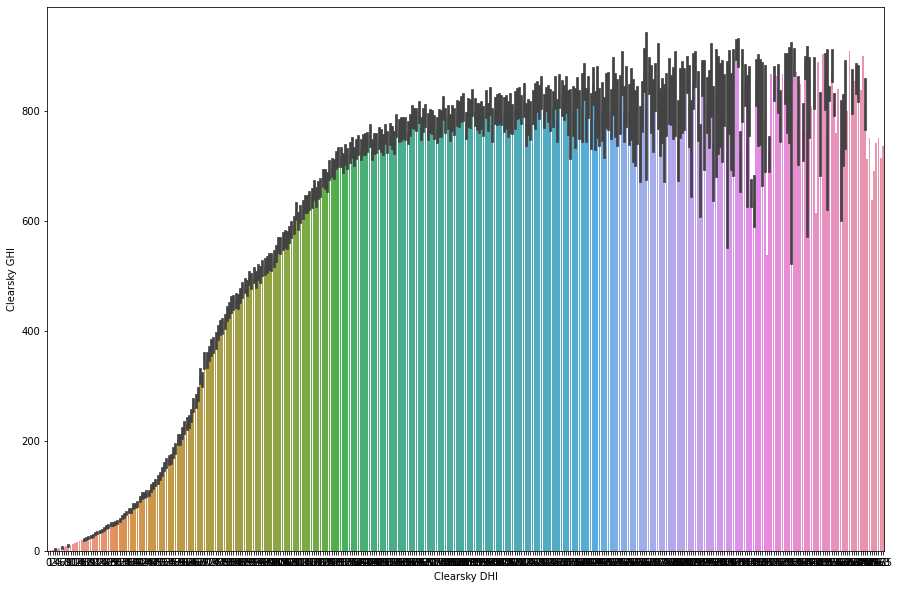

In [134]:
plot_relation('Clearsky DHI', 'Clearsky GHI', df)

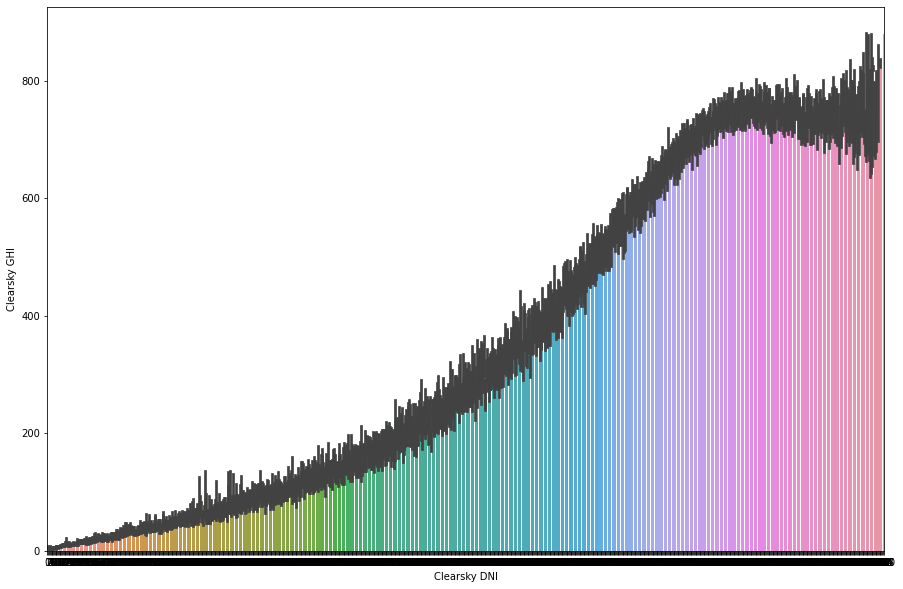

In [135]:
plot_relation('Clearsky DNI', 'Clearsky GHI', df)

In [136]:
plot_relation('Clearsky DNI', 'Hour', df)

KeyboardInterrupt: ignored

<Figure size 1080x720 with 0 Axes>

In [ ]:
plot_relation('Clearsky GHI', 'Hour', df)

In [ ]:
plot_relation('Clearsky DHI', 'Temperature', df)

In [ ]:
plot_relation('Clearsky DNI', 'Temperature', df)

In [ ]:
plot_relation('Clearsky GHI', 'Temperature', df)

In [ ]:
plot_relation('Dew Point', 'Temperature', df)

In [ ]:
plot_relation('Dew Point', 'Precipitable Water', df)

In [ ]:
plot_relation('Temperature', 'Precipitable Water', df)

In [137]:
df_train = df[df.Year!=2018]
df_test = df[df.Year==2018]

In [138]:
df_train.sample(10)

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
83302,2013,10,2,11,0,0,0,0,8,15.0,15.0,1000,100.00,97.21,2.376,96.3,0.8,0
144576,2017,4,1,0,0,0,0,0,0,13.0,17.0,1000,81.39,91.96,1.558,292.9,1.9,0
102711,2014,11,10,19,30,84,862,538,0,6.0,23.0,1000,35.51,58.25,1.221,53.9,1.2,0
122461,2015,12,27,6,30,0,0,0,7,19.0,19.0,1010,100.00,165.37,3.397,126.5,2.2,0
120079,2015,11,7,15,30,90,811,558,0,21.0,26.0,1000,74.01,54.80,4.238,210.4,1.3,0
31351,2010,10,16,3,30,0,0,0,0,6.0,13.0,1000,65.92,145.44,0.908,341.0,1.8,0
146,2009,1,4,1,0,0,0,0,3,15.0,15.0,1000,100.00,118.09,3.245,184.6,2.0,0
31887,2010,10,27,7,30,0,0,0,0,22.0,22.0,1000,100.00,144.50,3.913,196.0,2.3,0
90433,2014,2,28,0,30,0,0,0,0,1.0,3.0,1000,87.54,103.13,0.374,310.5,1.4,0
30021,2010,9,18,10,30,0,0,0,3,19.0,22.0,1000,90.69,101.62,3.778,183.7,1.1,0


In [139]:
df_test.sample(10)

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
175118,2018,12,28,7,0,0,0,0,7,17.7,17.9,1007,98.83,159.71,4.0,173.0,4.6,0
163993,2018,5,10,12,30,101,546,300,0,17.1,23.4,1009,67.67,68.64,2.8,258.0,2.6,0
168326,2018,8,8,19,0,142,827,898,0,23.5,32.3,1006,59.91,23.95,4.8,232.0,2.1,0
160034,2018,2,17,1,0,0,0,0,3,17.2,17.9,1009,95.55,111.23,2.8,265.0,1.5,0
167837,2018,7,29,14,30,179,656,643,0,21.6,31.0,1006,57.29,44.94,4.6,198.0,0.8,0
171184,2018,10,7,8,0,0,0,0,7,20.0,20.6,1009,96.17,134.92,2.9,120.0,0.9,0
168601,2018,8,14,12,30,116,348,223,7,23.8,24.9,1006,93.78,72.01,4.8,246.0,0.5,0
159308,2018,2,1,22,0,65,502,175,4,11.3,14.8,1009,79.81,77.31,2.2,204.0,1.9,100
162955,2018,4,18,21,30,99,780,515,0,15.0,25.9,1004,50.98,57.80,1.6,228.0,5.1,0
172728,2018,11,8,12,0,7,52,7,8,18.1,18.2,1006,99.57,89.86,3.9,185.0,0.9,32


# DNI

In [140]:
X_train = df_train.drop(columns=['Year','Clearsky DHI','Clearsky DNI','Clearsky GHI'])
DNI_train = df_train['Clearsky DNI'].values
X_test = df_test.drop(columns=['Year','Clearsky DHI','Clearsky DNI','Clearsky GHI'])
DNI_test = df_test['Clearsky DNI'].values

In [141]:
linr = LinearRegression()
clf = linr.fit(X_train, DNI_train)
DNI_pred = clf.predict(X_test)
DNI_pred

array([ 155.82509054,  112.09467605,   87.61352598, ..., -498.16582582,
        356.06983726,  323.65923646])

In [142]:
MSE=mean_squared_error(DNI_test, DNI_pred)
MSE

114893.45885016886

In [143]:
RMSE = np.sqrt(MSE)
RMSE

338.95937640102073

In [144]:
dtc = DecisionTreeClassifier()
dtc_clf = dtc.fit(X_train, DNI_train)
DNI_pred1 = dtc_clf.predict(X_test)
DNI_pred1

array([ 0,  0,  0, ..., 22,  0,  0])

In [145]:
print(mean_squared_error(DNI_test, DNI_pred1))

3295.483219178082


In [146]:
print(np.sqrt(mean_squared_error(DNI_test, DNI_pred1)))

57.40629947295054


In [147]:
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train, DNI_train)
DNI_pred2 = xgbr_clf.predict(X_test)
DNI_pred2

array([-1.5596439, -3.0404794,  1.5277959, ..., 85.38364  ,  3.3316185,
        5.1529756], dtype=float32)

In [148]:
print(mean_squared_error(DNI_test, DNI_pred2))

1608.3886924843612


In [149]:
print(np.sqrt(mean_squared_error(DNI_test, DNI_pred2)))

40.10472157345518


# DHI

In [150]:
X_train = df_train.drop(columns=['Year','Clearsky DHI','Clearsky GHI'])
DHI_train = df_train['Clearsky DHI'].values
X_test = df_test.drop(columns=['Year','Clearsky DHI','Clearsky DNI','Clearsky GHI'])
X_test.insert(4, "Clearsky DNI", DNI_pred2)
DHI_test = df_test['Clearsky DHI'].values

In [151]:
linr = LinearRegression()
clf = linr.fit(X_train, DHI_train)
DHI_pred = clf.predict(X_test)
DHI_pred

array([ 10.68056014,   5.60864682,   1.29804891, ..., -75.78160473,
        30.53081913,  27.23988214])

In [152]:
MSE=mean_squared_error(DHI_test, DHI_pred)
MSE

1993.157401402222

In [153]:
RMSE = np.sqrt(MSE)
RMSE

44.644791425229236

In [154]:
dtc = DecisionTreeClassifier()
dtc_clf = dtc.fit(X_train, DHI_train)
DHI_pred1 = dtc_clf.predict(X_test)
DHI_pred1

array([ 0,  0,  0, ..., 12,  0,  0])

In [155]:
print(mean_squared_error(DHI_test, DHI_pred1))

268.8841324200913


In [156]:
print(np.sqrt(mean_squared_error(DHI_test, DHI_pred1)))

16.39768680089028


In [157]:
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train, DHI_train)
DHI_pred2 = xgbr_clf.predict(X_test)
DHI_pred2

array([ 0.0135269 ,  0.01753754,  2.6207738 , ..., 12.059044  ,
        2.700777  ,  3.4080846 ], dtype=float32)

In [158]:
print(mean_squared_error(DHI_test, DHI_pred2))

263.6924300587255


In [159]:
print(np.sqrt(mean_squared_error(DHI_test, DHI_pred2)))

16.238609240286728


# GHI

In [160]:
X_train = df_train.drop(columns=['Year','Clearsky GHI'])
GHI_train = df_train['Clearsky GHI'].values
X_test = df_test.drop(columns=['Year','Clearsky DHI','Clearsky DNI','Clearsky GHI'])
X_test.insert(4, "Clearsky DHI", DHI_pred2)
X_test.insert(5,'Clearsky DNI',DNI_pred2)
GHI_test = df_test['Clearsky GHI'].values

In [161]:
linr = LinearRegression()
clf = linr.fit(X_train, GHI_train)
GHI_pred = clf.predict(X_test)
GHI_pred

array([  39.52275701,   32.17736539,   24.69366303, ..., -996.72058867,
        -98.48304064, -102.34745008])

In [162]:
MSE=mean_squared_error(GHI_test, GHI_pred)
MSE

117366.69180650455

In [163]:
RMSE = np.sqrt(MSE)
RMSE

342.58822485092

In [164]:
dtc = DecisionTreeClassifier()
dtc_clf = dtc.fit(X_train, GHI_train)
GHI_pred1 = dtc_clf.predict(X_test)
GHI_pred1

array([ 0,  0,  3, ..., 14,  3,  3])

In [165]:
print(mean_squared_error(GHI_test, GHI_pred1))

78.92465753424658


In [166]:
print(np.sqrt(mean_squared_error(GHI_test, GHI_pred1)))

8.883955061471584


In [167]:
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train, GHI_train)
GHI_pred2 = xgbr_clf.predict(X_test)
GHI_pred2

array([ 0.02685566,  0.04695784,  2.6834698 , ..., 14.304886  ,
        2.7653058 ,  3.0199983 ], dtype=float32)

In [168]:
print(mean_squared_error(GHI_test, GHI_pred2))

52.79887667061211


In [169]:
print(np.sqrt(mean_squared_error(GHI_test, GHI_pred2)))

7.266283552863328


In [197]:
df_sub = pd.read_csv("Reformated 9 - Reformated 9.csv")
df_sub.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI,Latitude,Longitude
0,2011,1,28,12,0,3,13.5,3.2,-23,79.3,-94.45,0.51,189,2.3,0,0,0,0,71,-156.0
1,2011,2,28,12,0,3,13.5,1.2,-21,79.3,-94.45,1.59,189,2.3,0,0,0,0,71,-156.0
2,2011,3,28,12,0,3,13.5,1.3,-21,79.3,-94.45,0.71,189,2.3,0,0,0,0,71,-156.0
3,2011,4,28,12,0,3,13.5,8.3,-18,79.3,-94.45,0.06,189,2.3,0,0,0,0,71,-156.0
4,2011,5,28,12,0,3,13.5,5.3,-5,79.3,-94.45,0.26,189,2.3,0,0,0,0,71,-156.0


In [198]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23812 entries, 0 to 23811
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                23812 non-null  int64  
 1   Month               23812 non-null  int64  
 2   Day                 23812 non-null  int64  
 3   Hour                23812 non-null  int64  
 4   Minute              23812 non-null  int64  
 5   Cloud Type          23812 non-null  int64  
 6   Dew Point           23812 non-null  float64
 7   Temperature         23812 non-null  float64
 8   Pressure            23812 non-null  int64  
 9   Relative Humidity   23812 non-null  float64
 10  Solar Zenith Angle  23812 non-null  float64
 11  Precipitable Water  23812 non-null  float64
 12  Wind Direction      23812 non-null  int64  
 13  Wind Speed          23812 non-null  float64
 14  Fill Flag           23812 non-null  int64  
 15  Clearsky DHI        23812 non-null  int64  
 16  Clea

In [199]:
df_sub.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Latitude              0
Longitude             1
dtype: int64

In [200]:
df.duplicated().sum()

0

In [201]:
df_sub = df_sub.drop(columns=['Clearsky DHI','Clearsky DNI','Clearsky GHI', 'Latitude', 'Longitude'])

In [202]:
df_sub['Pressure'].dtype

dtype('int64')

# Train DNI

In [203]:
X_train = df.drop(columns=['Year','Clearsky DHI','Clearsky DNI','Clearsky GHI'])
DNI_train = df['Clearsky DNI'].values
X_test = df_sub.drop(columns=['Year'])
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train, DNI_train)

DNI_pred = xgbr_clf.predict(X_test)
DNI_pred = np.where(DNI_pred<0,0,DNI_pred)

# Train DHI

In [204]:
X_train = df.drop(columns=['Year','Clearsky DHI','Clearsky GHI'])
DHI_train = df['Clearsky DHI'].values
X_test = df_sub.drop(columns=['Year'])
X_test.insert(4, "Clearsky DNI", DNI_pred)
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train,DHI_train)

DHI_pred = xgbr_clf.predict(X_test)
DHI_pred = np.where(DHI_pred<0,0,DHI_pred)

# Train GHI

In [205]:
X_train = df.drop(columns=['Year','Clearsky GHI'])
GHI_train = df['Clearsky GHI'].values
X_test = df_sub.drop(columns=['Year'])
X_test.insert(4, "Clearsky DHI", DHI_pred)
X_test.insert(5,'Clearsky DNI',DNI_pred)
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train,GHI_train)

GHI_pred = xgbr_clf.predict(X_test)
GHI_pred = np.where(GHI_pred<0,0,GHI_pred)

Submit

In [206]:
df_pred = pd.DataFrame([DHI_pred,DNI_pred,GHI_pred]).T
df_pred.columns = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']
df_pred.to_csv('submission.csv', index=False)

In [208]:
df_sub2 = pd.read_csv("Reformated 9 - Reformated 9.csv")
df_sub2.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI,Latitude,Longitude
0,2011,1,28,12,0,3,13.5,3.2,-23,79.3,-94.45,0.51,189,2.3,0,0,0,0,71,-156.0
1,2011,2,28,12,0,3,13.5,1.2,-21,79.3,-94.45,1.59,189,2.3,0,0,0,0,71,-156.0
2,2011,3,28,12,0,3,13.5,1.3,-21,79.3,-94.45,0.71,189,2.3,0,0,0,0,71,-156.0
3,2011,4,28,12,0,3,13.5,8.3,-18,79.3,-94.45,0.06,189,2.3,0,0,0,0,71,-156.0
4,2011,5,28,12,0,3,13.5,5.3,-5,79.3,-94.45,0.26,189,2.3,0,0,0,0,71,-156.0


In [209]:
df_submission = pd.read_csv("submission.csv")
df_submission["Latitude"] = df_sub2["Latitude"]
df_submission["Longitude"] = df_sub2["Longitude"]

In [210]:
df_submission.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Latitude,Longitude
0,219.08719,806.3840,1013.93884,71,-156.0
1,225.41620,755.7638,987.50336,71,-156.0
2,271.39728,722.8686,992.27420,71,-156.0
3,244.72041,771.1033,1007.34406,71,-156.0
4,244.60611,770.5008,1003.50616,71,-156.0


In [211]:
df_submission.to_csv('submission.csv', index=False)

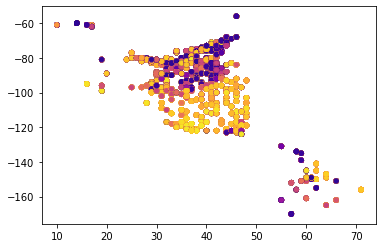

In [224]:
import matplotlib.pyplot as plt
plt.scatter(df_submission['Latitude'], df_submission['Longitude'], s=20, c=df_submission['Clearsky DNI'], cmap='plasma')


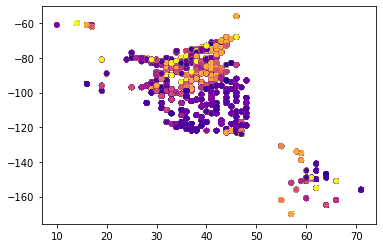

In [221]:
plt.scatter(df_submission['Latitude'], df_submission['Longitude'], s=20, c=df_submission['Clearsky DHI'], cmap='plasma')

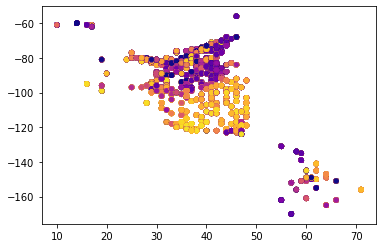

In [222]:
plt.scatter(df_submission['Latitude'], df_submission['Longitude'], s=20, c=df_submission['Clearsky GHI'], cmap='plasma')

In [219]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.5 MB/s eta 0:00:00
